# Predicting the Resale Value of Used Cars

#    Introduction

Task : I aim to develop a machine learning model that can predict the resale (market) value of used cars based on various attributes and characteristics of the cars.  

Goal : This can help sellers set appropriate prices and buyers to understand market trends and value, and accurate predictions can assist in making informed decisions.

# Load the Dataset

* Import a library 
* Load the dataset from the CSV file.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Load the dataset
car_data = pd.read_csv('car_data.csv')

# Explore the Data

* Display the first five rows of the dataset.
* Check data shape.
* Check data type.
* Check for any missing values.
* Check for duplicate.
* Calculate basic statistics of the features.
* Drop unnecessary column

In [3]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
car_data.shape

(4340, 8)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
# check whether there are null values in the dataset
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
car_data[car_data.duplicated(keep=False)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


* Keeping duplicates might bias the model towards overrepresented data points, especially if the number of duplicates is significant compared to the dataset size. 
* If the same observation is present in both the training and testing sets, this could lead to data leakage and an overestimation of the model's performance.

In [8]:
# Remove duplicates while keeping the first occurrence

car_data = car_data.drop_duplicates(keep='first')

In [9]:
car_data.shape

(3577, 8)

In [10]:
#create 'age' feature from 'year' column based on the latest year in the data which is 2020

car_data['age'] = 2020 - car_data['year']
car_data.drop('year',axis=1,inplace = True)

In [11]:
#numerical stats
car_data.describe()

,selling_price,km_driven,age
count,3.577000e+03,3577.000000,3577.000000
mean,4.739125e+05,69250.545709,7.037462
std,5.093018e+05,47579.940016,4.251759
min,2.000000e+04,1.000000,0.000000
25%,2.000000e+05,36000.000000,4.000000
50%,3.500000e+05,60000.000000,7.000000
75%,6.000000e+05,90000.000000,10.000000
max,8.900000e+06,806599.000000,28.000000


In [12]:
car_data = car_data.drop(['name'], axis=1)

Remove the 'car_name' column from the dataset because some machine learning models, such as XGBoost, cannot directly process columns with an object data type. Furthermore, the name of the car is not relevant to our prediction task, suggesting that dropping this column could be beneficial.

# Visualize the Data

* Understand the Numeric variables and catigorical variables.
* Use a scatter plot to visualize the relationship between each feature and the target variable ("selling price").
* Encode catigorical variables.
* Detect outlier by using boxplox.
* Transform outlier by using log transformation.
* Check correlation.

#### The relationship between a quantitative explanatory variable and a quantitative response variable.

*  Numeric variables

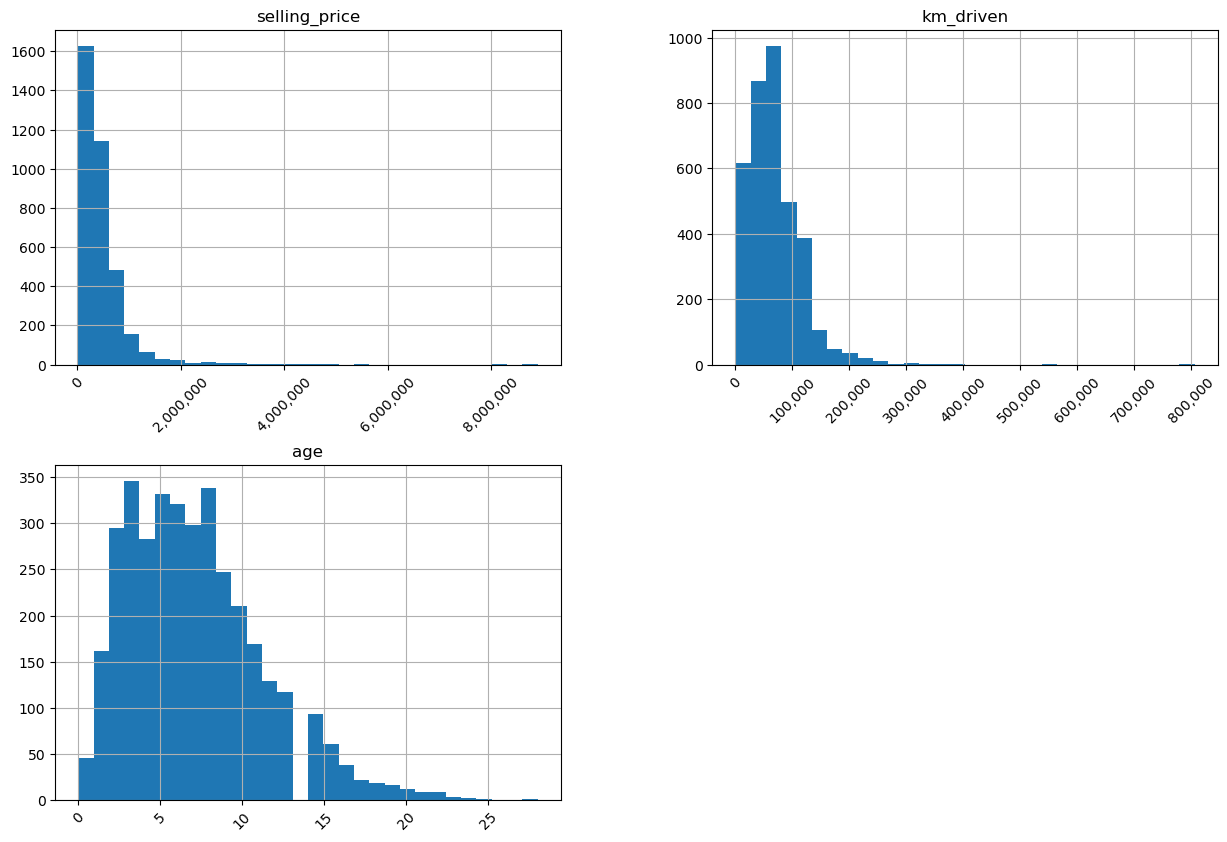

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plot the histograms for all the columns in car_data
axes = car_data.hist(bins=30, figsize=(15,10))

# Iterate over each subplot (axes) to set the formatter
for ax in axes.flatten():  # flatten in case there is a 2D array of axes
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.tick_params(axis='x', rotation=45)

plt.show()

#### The relationship between a categorical explanatory variable and a quantitative response variable.

* categorical variables 

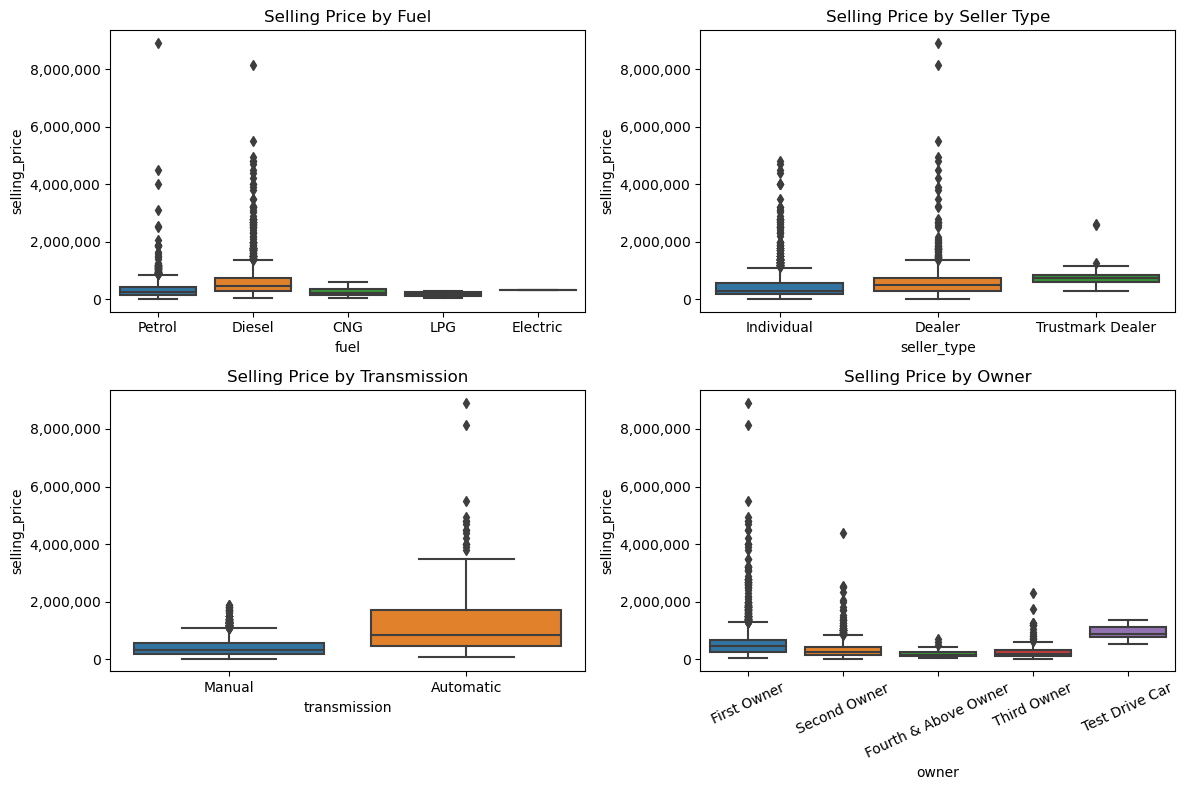

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Adjust the size as needed

# Flatten the array of axes to easily iterate over it
axs = axs.flatten()

# Now plot individual boxplots on each subplot axis
sns.boxplot(x='fuel', y='selling_price', data=car_data, ax=axs[0])
axs[0].set_title('Selling Price by Fuel')

sns.boxplot(x='seller_type', y='selling_price', data=car_data, ax=axs[1])
axs[1].set_title('Selling Price by Seller Type')

sns.boxplot(x='transmission', y='selling_price', data=car_data, ax=axs[2])
axs[2].set_title('Selling Price by Transmission')

sns.boxplot(x='owner', y='selling_price', data=car_data, ax=axs[3])
axs[3].set_title('Selling Price by Owner')
axs[3].tick_params(axis='x', rotation=25)  # Rotate x-axis labels

# Iterate over each subplot axis to set the y-axis formatter
for ax in axs:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


* Scatterplot Analysis

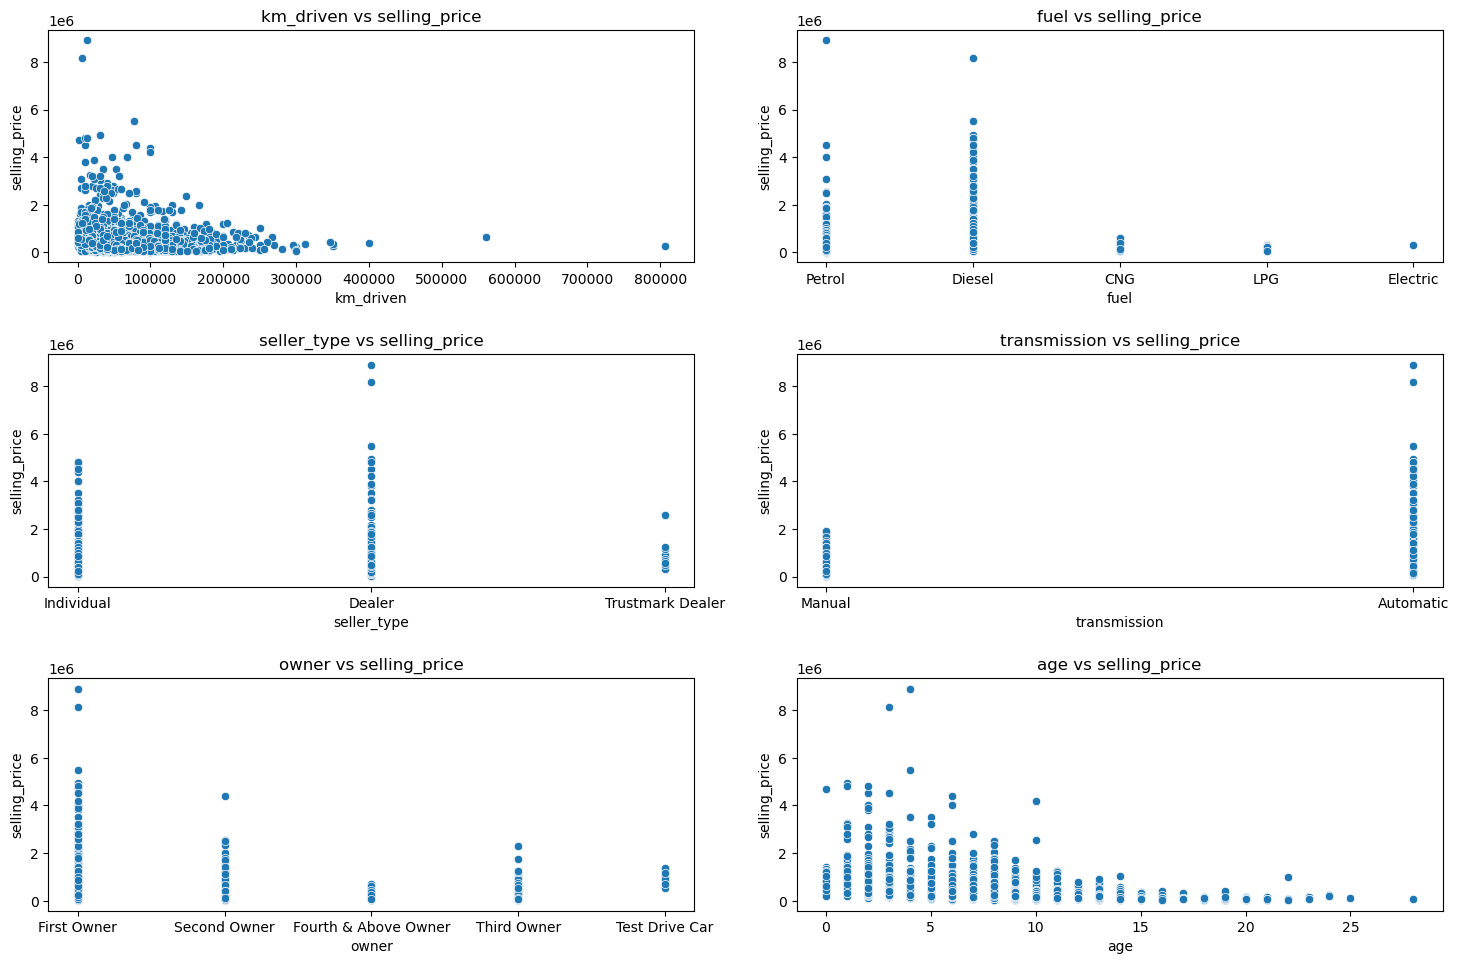

In [15]:
def create_scatterplot(y_axis, column_names, data):
    # Set figure size
    plt.figure(figsize=(15, 10))

    # Loop over column names list to plot columns
    for index, col in enumerate(column_names):
        # Calculate the number of rows needed for subplots based on the number of columns
        n_rows = (len(column_names) + 1) // 2
        plt.subplot(n_rows, 2, index + 1)  # create sub-plot

        # Create a scatterplot for each column against the y-axis feature
        sns.scatterplot(x=data[col], y=data[y_axis])

        # Set title to each plot
        plt.title(f'{col} vs {y_axis}')

        # Set x and y labels
        plt.xlabel(col)
        plt.ylabel(y_axis)

    # Set layout between two plots
    plt.tight_layout(pad=2)

    plt.show()

# Assuming 'selling_price' is the feature on the y-axis and you want to compare it with several other features
y_axis = 'selling_price'
column_names = ['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'age']  # Add other relevant features from the dataset

# Call the function with the dataset
create_scatterplot(y_axis, column_names, car_data)

* Encoding categorical variables

In [16]:
# Assuming 'column_name' is the column you want to encode

mapping_fuel = {'Petrol': 1, 'Diesel': 2, 'CNG': 3, 'LPG': 4, 'Electric':5}
car_data['fuel'] = car_data['fuel'].map(mapping_fuel)

mapping_type = {'Individual': 1, 'Dealer': 2, 'Trustmark Dealer': 3}
car_data['seller_type'] = car_data['seller_type'].map(mapping_type)

mapping_trans = {'Manual': 1, 'Automatic': 2}
car_data['transmission'] = car_data['transmission'].map(mapping_trans)

mapping_owner = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3,
                 'Fourth & Above Owner': 4, 'Test Drive Car': 5}
car_data['owner'] = car_data['owner'].map(mapping_owner)


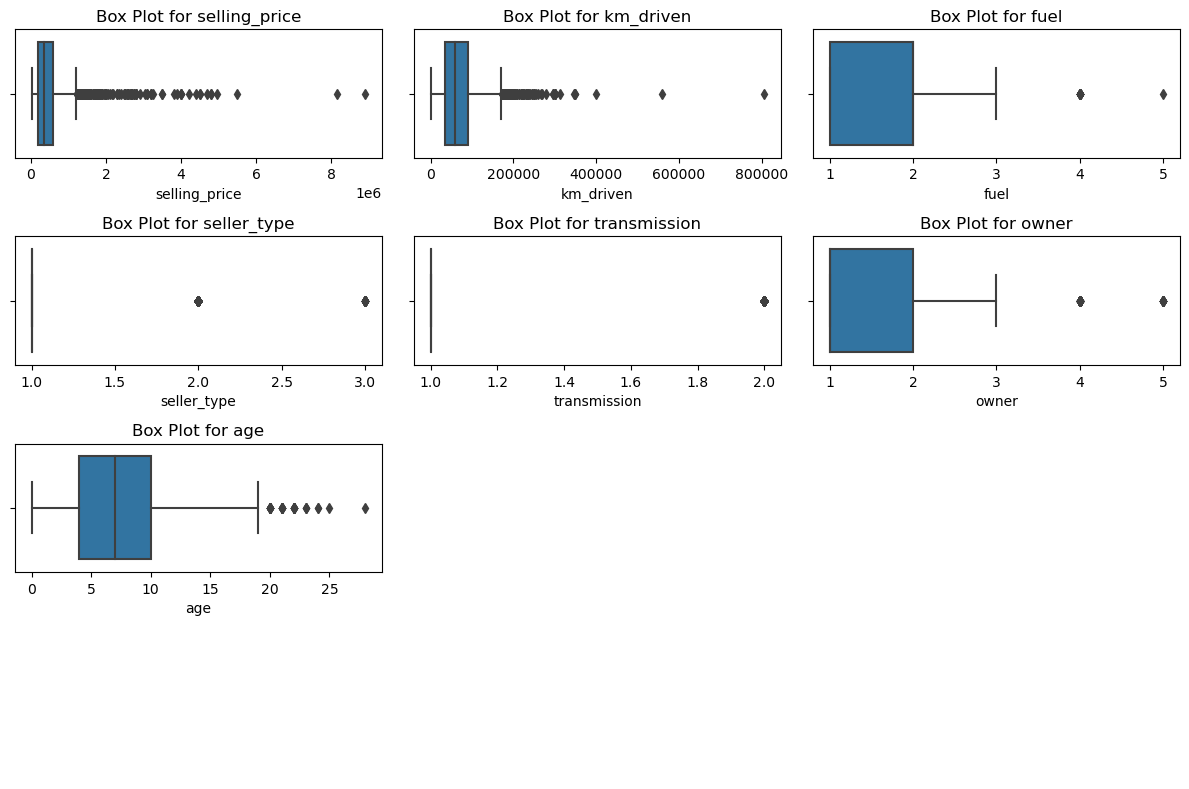

In [17]:
# List of numerical columns
num_cols = ['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'age']

# Calculate the number of rows needed for subplots (one row for every two columns)
n_rows = int(np.ceil(len(num_cols) / 2))

# Set up subplots
fig, axes = plt.subplots(nrows=n_rows, ncols= 3, figsize=(12, 8))  # Adjust the size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create box plots for each numerical column
for i, num_col in enumerate(num_cols):
    sns.boxplot(x=num_col, data=car_data, ax=axes[i])
    axes[i].set_title(f'Box Plot for {num_col}')
    axes[i].set_xlabel(num_col)
    axes[i].set_ylabel('')

# If there are any remaining empty subplots, turn them off
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


* Transform outlier by using log transformation.

In [18]:
# Assuming 'df' is your DataFrame and 'selling_price' and 'km_driven' are the columns you want to transform
# Make sure to handle zero values since log(0) is undefined

car_data['selling_price'] = car_data['selling_price'].apply(lambda x: np.log(x) if x > 0 else 0)
car_data['km_driven'] = car_data['km_driven'].apply(lambda x: np.log(x) if x > 0 else 0)

# Now, 'selling_price' and 'km_driven' have been transformed logarithmically


As can be seen from the boxplots above, there are outliers in the dataset.
In this process, I decided not to remove outliers because the changes have not improved their performance as expected.

#### The relationship between quanlitative variables after manage the outlier.

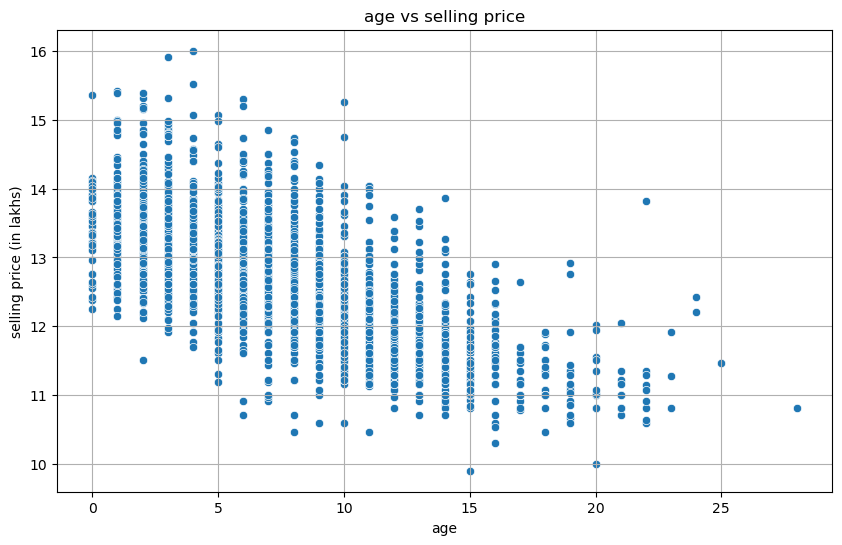

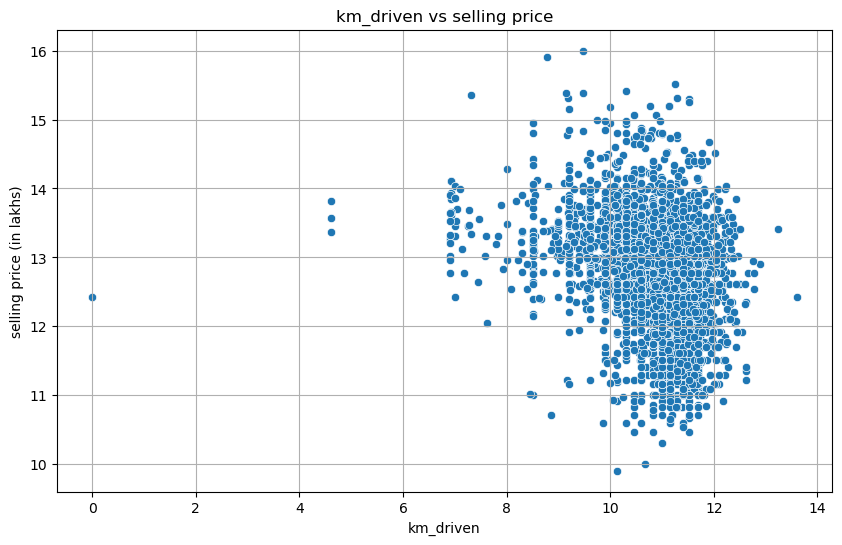

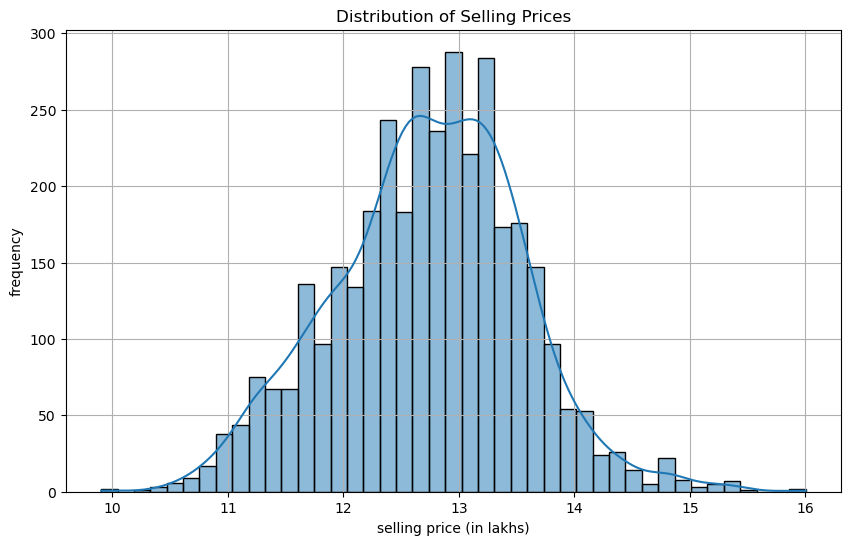

In [19]:
# Visualization of relationships
# Relationship between Year and Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='selling_price', data=car_data)
plt.title('age vs selling price')
plt.xlabel('age')
plt.ylabel('selling price (in lakhs)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=car_data)
plt.title('km_driven vs selling price')
plt.xlabel('km_driven')
plt.ylabel('selling price (in lakhs)')
plt.grid(True)
plt.show()

# Histogram of Selling Price
plt.figure(figsize=(10, 6))
sns.histplot(car_data['selling_price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('selling price (in lakhs)')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

In [20]:
#check correlation between the 'selling_price' feature and other variables of dataset

numeric_data = car_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

selling_price_corr = correlation_matrix['selling_price']

print(selling_price_corr)

selling_price    1.000000
km_driven       -0.288619
fuel             0.293973
seller_type      0.245006
transmission     0.364683
owner           -0.318595
age             -0.698719
Name: selling_price, dtype: float64


# Split the Data

* Normalize the data.
* Split the dataset into training and testing sets.

In [21]:
car_data

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,11.002100,11.156251,1,1,1,1,13
1,11.813030,10.819778,1,1,1,1,13
2,13.304685,11.512925,2,1,1,1,8
3,12.429216,10.736397,1,1,1,1,3
4,13.017003,11.856515,2,1,1,2,6
...,...,...,...,...,...,...,...
4335,12.923910,11.289782,2,1,1,2,6
4336,12.923910,11.289782,2,1,1,2,6
4337,11.608236,11.326596,1,1,1,2,11
4338,13.670485,11.407565,2,1,1,1,4


In [22]:
from sklearn.preprocessing import MinMaxScaler
normalization = MinMaxScaler()

In [23]:
from sklearn.model_selection import train_test_split

# Select the features from the car_data DataFrame
features = car_data[['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'age']]

# Fit the scaler to the features and transform them
X_normalized = normalization.fit_transform(features)
y = car_data['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (2861, 6) (2861,)
Test set: (716, 6) (716,)


# Build and Train the Model

Applying regression models

1. Linear Regression
2. Decision Trees
3. XGBoots
4. Random Forest Regression
5. Support Vector Machines (SVM)
6. K-Nearest Neighbors (KNN)
7. Lasso Regression

#        1. Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate the Model

In [25]:
# Making predictions and evaluating the model
y_pred = model.predict(X_test)

# Evaluate the model 
from sklearn.metrics import mean_squared_error, r2_score

mse_LI = mean_squared_error(y_test, y_pred)
r2_LI = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_LI}')
print(f'R-squared: {r2_LI}')

Mean Squared Error: 0.2318941008909527
R-squared: 0.6618244473279498


In [26]:
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)


Coefficient: 
 [ 0.07997494  1.369813    0.33204299  0.8045038  -0.17704727 -3.34191446]
Intercept: 
 13.234461584594559


#        2. Decision Tree Regression

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

decision_tree = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Make predictions with the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the performance of the model
mse_DT = mean_squared_error(y_test, y_pred)
rmse_DT = mse_DT ** 0.5

print(f'Mean Squared Error: {mse_DT}')
print(f'Root Mean Squared Error: {rmse_DT}')

Mean Squared Error: 0.3239542529040185
Root Mean Squared Error: 0.5691697926840623


# Prediction

######Make predictions on the dataset and store in variables called car_pred

In [28]:
car_pred = decision_tree.predict(X_test)
print(car_pred [0:5])
print(y_test [0:5])

[12.98587131 13.44444688 14.40329722 14.49607896 11.5817183 ]
1045    12.506177
3194    13.171154
1530    13.805460
553     15.150512
1612    12.345830
Name: selling_price, dtype: float64


# 3. XGBoost Regression

In [29]:
!pip install xgboost

In [30]:
import xgboost as xgb

# Separate the features and the target variable
X = car_data.drop('selling_price', axis=1)
y = car_data['selling_price']

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                          colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the target on the test set
y_pred = xg_reg.predict(X_test)

# Evaluate the performance
mse_XG = mean_squared_error(y_test, y_pred)
r2_XG = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_XG}')
print(f'R-squared: {r2_XG}')

Mean Squared Error: 0.21753395094806222
R-squared: 0.6827661255540558


# 4. Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor

X = car_data.drop('selling_price', axis=1)  
y = car_data['selling_price']

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the performance metrics
mse_RF = mean_squared_error(y_test, y_pred)
r2_RF = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_RF}')
print(f'R squared: {r2_RF}')

Mean Squared Error: 0.242950801720367
R squared: 0.6457002514154586


# 5. Support Vector Machines (SVM)

In [32]:
from sklearn.svm import SVR

X = car_data.drop('selling_price', axis=1)
y = car_data['selling_price']

# Create the SVM model
model = SVR(kernel='linear')

# Train the SVM model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the performance metrics
mse_SVM = mean_squared_error(y_test, y_pred)
r2_SVM = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Mean Squared Error: {mse_SVM}')
print(f'R squared: {r2_SVM}')

Mean Squared Error: 0.23137545201592297
R squared: 0.6625808027905598


# 6. K-Nearest Neighbors (KNN)

In [33]:
from sklearn.neighbors import KNeighborsRegressor

X = car_data.drop('selling_price', axis=1)  
y = car_data['selling_price']

knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the KNN regressor
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_model.predict(X_test)

# Calculate the performance metrics
mse_KNN = mean_squared_error(y_test, y_pred)
r2_KNN = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Mean Squared Error: {mse_KNN}')
print(f'R squared: {r2_KNN}')

Mean Squared Error: 0.2442758309313587
R squared: 0.6437679362594795


# 7. Lasso Regression

In [34]:
from sklearn.linear_model import Lasso

# Scale the features (Lasso is sensitive to the scale of input features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Lasso Regression model with an alpha value (regularization strength)
lasso = Lasso(alpha=0.1)

# Fit the model to the training data
lasso.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_lasso}")
print(f"R-squared: {r2_lasso}")

Mean Squared Error: 0.27283387526594677
R-squared: 0.6021212001459821


# Evaluation all models

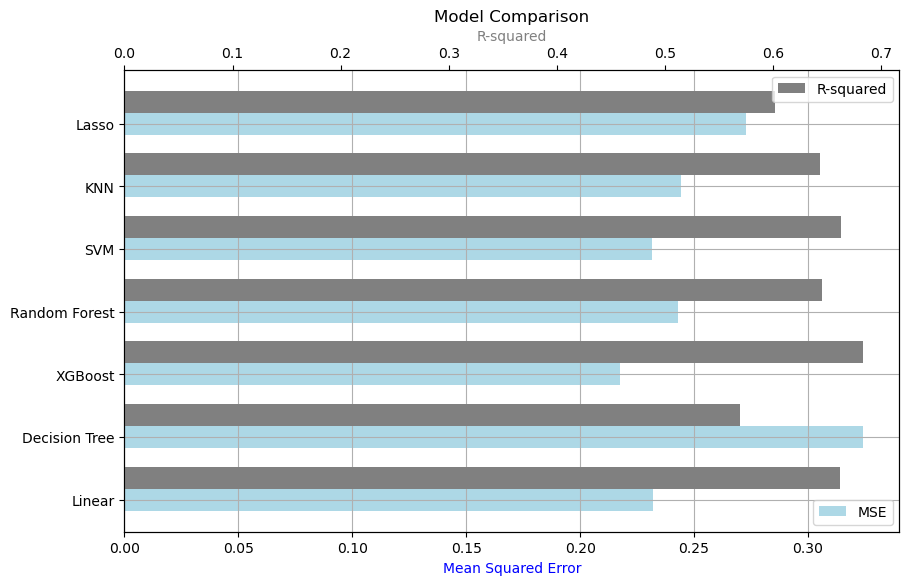

In [35]:
# Mean Squared Error values for each model
mse_values = [0.2318941008909527,  # Linear Regression
              0.3239542529040185,  # Decision Tree Regression
              0.21753395094806222, # XGBoost Regression
              0.242950801720367,   # Random Forest Regression
              0.23137545201592297, # SVM Regression
              0.2442758309313587,  # KNN Regression
              0.2728338752659453]  # Lasso Regression

# R-squared values for each model
r2_values = [0.6618244437297498,   # Linear Regression
             0.5691697926840623,   # Decision Tree Regression
             0.6827661255540558,   # XGBoost Regression
             0.6457002514154586,   # Random Forest Regression
             0.6625808027905598,   # SVM Regression
             0.6437679362594795,   # KNN Regression
             0.6021212001459844]  # Lasso Regression

model_names = ['Linear', 'Decision Tree', 'XGBoost', 'Random Forest', 'SVM', 'KNN', 'Lasso']

# Creating subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar height
bar_height = 0.35

# Bar positions
r1 = range(len(mse_values))
r2 = [x + bar_height for x in r1]

# Plotting MSE values
mse_bars = ax1.barh(r1, mse_values, height=bar_height, label='MSE', color='lightblue')

# Creating a second x-axis for the R-squared values
ax2 = ax1.twiny()

# Plotting R-squared values
r2_bars = ax2.barh(r2, r2_values, height=bar_height, label='R-squared', color='gray')

# Adding the legend
ax1.legend(loc='lower right')
ax2.legend(loc='upper right')

# Setting the graph title
plt.title('Model Comparison')

# Labeling axes
ax1.set_xlabel('Mean Squared Error', color='blue')
ax1.set_yticks(range(len(mse_values)))
ax1.set_yticklabels(model_names)
ax2.set_xlabel('R-squared', color='gray')

# Adding a grid
ax1.grid(True)

# Showing the plot
plt.show()

The best model based on this graph would be the one with the lowest MSE and the highest R². Keep in mind that while R² is a measure of how well the model explains the variability of the data, MSE is a measure of the average squared difference between the observed actual outturns and the predictions by the model. Thus, in the context of regression analysis, a lower MSE and a higher R² indicate a better fit model to the data.

## The evaluation matrix:

In conclusion, The XGBoost regression model seems to show the best performance, with moderate quality. An R2 of 0.68 means the model is explaining about 68% of the variance in the in dependent variable that is predictable from the indepent varaibles but suggest there might be more complex underlying patterns in the data that the model is not capturing.